# Context
Finding if a person is depressed from their use of words on social media can definitely help in the cure!

# Predict depression
Sentimental Analysis can be very useful to find out depression and cure it before someone gets into serious trouble.

# Sentiment Analysis Using ML model
**What is depression?**

A mental health disorder characterised by persistently depressed mood or loss of interest in activities, causing significant impairment in daily life.
Possible causes include a combination of biological, psychological and social sources of distress. Increasingly, research suggests that these factors may cause changes in brain function, including altered activity of certain neural circuits in the brain.
The persistent feeling of sadness or loss of interest that characterises major depression can lead to a range of behavioural and physical symptoms. These may include changes in sleep, appetite, energy level, concentration, daily behaviour or self-esteem. Depression can also be associated with thoughts of suicide.
The mainstay of treatment is usually medication, talk therapy or a combination of the two. Increasingly, research suggests that these treatments may normalise brain changes associated with depression.

**Task** - To classify whether a person is depressed or not

>Data:<br>
> - The data has three columns [index, Message_to_examine, Labels(target)]<br>
> - Over 10k rows.<br>
> - message is in text format<br>
> - label is of 0 or 1.<br>

# Imports

In [190]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import en_core_web_sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from wordcloud import WordCloud
from sklearn.feature_extraction import text 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. View the data

In [160]:
data= pd.read_csv("E:\\Xaviers\\Sem 2\\ML\\sentiment_tweets.csv")
data

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


# 2. Preprocessing

In [161]:
# Checking for null values

data.isna().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

#### no null values found

In [162]:
print(f'{data.shape} is the shape of the data')
print("=================================================")
print(f'Description: \n{data.describe()}')
print("=================================================")
print(f'Information: {data.info()}')

(10314, 3) is the shape of the data
Description: 
               Index  label (depression result)
count   10314.000000               10314.000000
mean   491253.470525                   0.224355
std    261688.134407                   0.417177
min       106.000000                   0.000000
25%    263019.250000                   0.000000
50%    514988.000000                   0.000000
75%    773521.500000                   0.000000
max    802313.000000                   1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB
Information: None


In [163]:
data= data.drop('Index', axis=1)

In [7]:
profile=ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()

In [62]:
lens = data["message to examine"].str.len()
lens.mean(), lens.std(), lens.max()

(92.61615280201667, 64.67090484279268, 874)

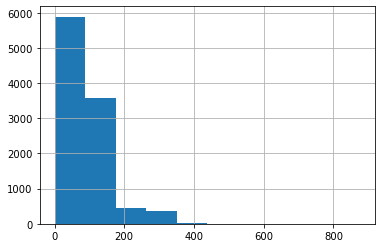

In [66]:
lens.hist()
plt.show()

In [164]:
print(data[data['label (depression result)'] == 0].shape[0]/data.shape[0]*100, "% of the data is of label 0 (Not Depressed)")
print(data[data['label (depression result)'] == 1].shape[0]/data.shape[0]*100, "% of the data is of label 1 (Depressed)")

77.56447547023463 % of the data is of label 0 (Not Depressed)
22.43552452976537 % of the data is of label 1 (Depressed)


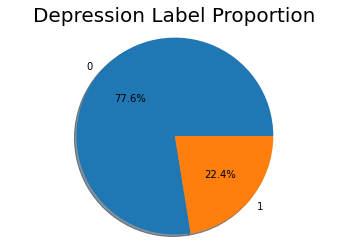

In [165]:
labels = ['0', '1']
sizes = [data['label (depression result)'].value_counts()[0],
         data['label (depression result)'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Depression Label Proportion', fontsize=20)
plt.show()

#### data is imbalanced

### StopWords
We can ignore words of no importance like conjunctions, adjective, etc, to make our input data much more meaningful to the algorithm. NLTK provides inbuilt corpus with stopwords to filer out them.

In [166]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Stemmer
A word stem is part of a word. It is sort of a normalization idea, but linguistic. Given words, NLTK can find the stems.

### Lemmatizer
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words.

In [167]:
nlp=nlp = spacy.load("en_core_web_sm")
lmtzr=WordNetLemmatizer()

def text_preprocess(text):
    lm = []
    text = nlp(text)
    for token in text:
        lm.append(token.lemma_)
    text = " ".join(lm)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text=[word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [168]:
# changing column names

data.columns = data.columns.str.replace(" ", "_")

In [169]:
data['processed'] = data['message_to_examine'].apply(text_preprocess)
data['processed']

0                       real good moment missssssssss much
1                            read manga httpplurkcompmzp1e
2        comeagainjen httptwitpiccom2y2lx httpwwwyoutub...
3        lapcat need send em accountant tomorrow oddly ...
4                        add MYSPACE myspacecomlookthunder
                               ...                        
10309     depression G Herbo mood stress people nt deserve
10310    depression succumb brain make feel like never ...
10311    Ketamine Nasal Spray show Promise Depression S...
10312            nt mistake bad day depression everyone em
10313                                                    0
Name: processed, Length: 10314, dtype: object

In [170]:
data['processed_1'] = data.processed.str.replace(r"[0-9]", "")

<ipython-input-170-2d49ce4acd3a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['processed_1'] = data.processed.str.replace(r"[0-9]", "")


In [171]:
data['processed_1'] = data.processed.str.replace(r"[0-9]", "")

<ipython-input-171-2d49ce4acd3a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['processed_1'] = data.processed.str.replace(r"[0-9]", "")


In [172]:
data['processed_1']

0                       real good moment missssssssss much
1                             read manga httpplurkcompmzpe
2        comeagainjen httptwitpiccomylx httpwwwyoutubec...
3        lapcat need send em accountant tomorrow oddly ...
4                        add MYSPACE myspacecomlookthunder
                               ...                        
10309     depression G Herbo mood stress people nt deserve
10310    depression succumb brain make feel like never ...
10311    Ketamine Nasal Spray show Promise Depression S...
10312            nt mistake bad day depression everyone em
10313                                                     
Name: processed_1, Length: 10314, dtype: object

In [209]:
wc = WordCloud(collocations=False,stopwords=stopwords.words('english').extend(['http://t.',"I'm",'http',"can't",'Å','Ā','like','t','åā','www','com','https']), background_color='white', colormap='Dark2',max_font_size=150, random_state=42)

In [210]:
text_to_analyze = ''
for i in data['processed_1']:
    text_to_analyze = text_to_analyze + ' ' + i

In [211]:
wc = wc.generate(text_to_analyze)

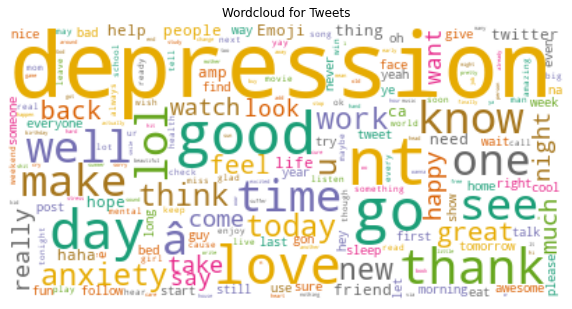

In [212]:
# Wordcloud plot
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud for Tweets')
plt.show()

# 3. Create Vetors for the words (Tfidf Vectorizer)

### TF-IDF for a word in a document is calculated by multiplying two different metrics:

The term frequency of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.
The inverse document frequency of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.
So, if the word is very common and appears in many documents, this number will approach 0. Otherwise, it will approach 1.
Multiplying these two numbers results in the TF-IDF score of a word in a document. The higher the score, the more relevant that word is in that particular document.

To put it in more formal mathematical terms, the TF-IDF score for the word t in the document d from the document set D is calculated as follows:

![TF-IDF Formula](Capture.png "TF-IDF")

In [173]:
vectorizer = TfidfVectorizer("english")
processed = vectorizer.fit_transform(data['processed_1'])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [174]:
data['processed_1'] = data.processed.str.replace(r"[0-9]", "")

<ipython-input-174-2d49ce4acd3a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['processed_1'] = data.processed.str.replace(r"[0-9]", "")


# 4. Initialize the model

In [175]:
X_train, X_test, y_train, y_test = train_test_split(processed, data['label_(depression_result)'], test_size=0.2)

In [176]:
# creating model instances

lr=LogisticRegression(solver='liblinear', penalty='l1')
nb=MultinomialNB()

# 5. Fit the model

In [180]:
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)

MultinomialNB()

# 6. Predict labels

In [186]:
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test) 

## Evaluating 

In [138]:
def conf_matrix_acc(y_true, y_pred):
    print(f'Confusion matrix\n:{confusion_matrix(y_true, y_pred)}\n')
    print(f'Accuracy score is : {accuracy_score(y_true, y_pred)}')
    print(f'Report:\n{classification_report(y_test,y_pred)}')
    return confusion_matrix(y_true, y_pred)

### without cross validation

In [139]:
print(f"Logistic Regression:")
con_lr=conf_matrix_acc(y_test,y_pred_lr)
print(f"\n=======================\nMultiNomial Naive Bayes:")
con_nb=conf_matrix_acc(y_test, y_pred_nb)

Logistic Regression:
Confusion matrix
:[[1596    0]
 [  12  455]]

Accuracy score is : 0.9941832283082889
Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1596
           1       1.00      0.97      0.99       467

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063


MultiNomial Naive Bayes:
Confusion matrix
:[[1594    2]
 [ 200  267]]

Accuracy score is : 0.9020843431895298
Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1596
           1       0.99      0.57      0.73       467

    accuracy                           0.90      2063
   macro avg       0.94      0.79      0.83      2063
weighted avg       0.91      0.90      0.89      2063



### K Fold Cross Validation

In [184]:
# prepare the cross-validation procedure for LR
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %f (%f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.994789 (0.002658)


In [182]:
# prepare the cross-validation procedure for NB
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %f (%f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.899647 (0.011911)


**The accuracy is nearly equal.**

## ROC CURVE

In [154]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(X_test)[:,1])
fpr, tpr, thresholds

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.01070664, 0.03211991, 0.04068522, 0.06423983,
        0.06852248, 0.09635974, 0.1006424 , 0.52890792, 0.53319058,
        0.98501071, 1.        ]),
 array([2.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99970684, 0.99970637,
        0.05865268, 0.00891759]))

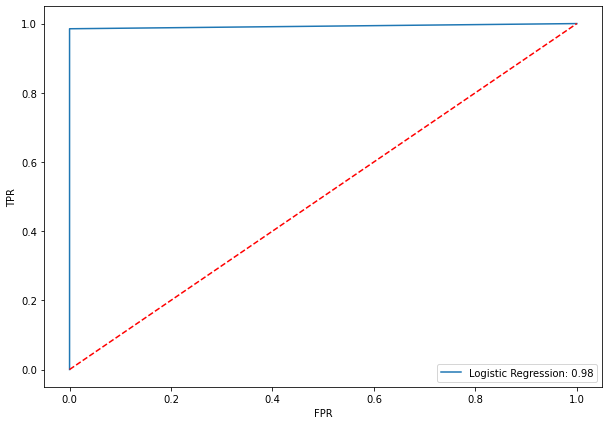

In [155]:
#Plot ROC for LR
score=roc_auc_score(y_test, lr.predict(X_test)) #get score
score
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr, label='Logistic Regression: '+str(score)[0:4])
plt.plot([0,1],[0,1],'r--') #r is red and -- is dashed line
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr,tpr,thresholds=roc_curve(y_test,nb.predict_proba(X_test)[:,1])
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.26566416e-04,
        6.26566416e-04, 6.26566416e-04, 6.26566416e-04, 1.25313283e-03,
        1.25313283e-03, 1.25313283e-03, 1.25313283e-03, 1.87969925e-03,
        1.87969925e-03, 3.75939850e-03, 3.75939850e-03, 4.38596491e-03,
        4.38596491e-03, 5.01253133e-03, 5.01253133e-03, 6.26566416e-03,
        6.26566416e-03, 6.89223058e-03, 6.89223058e-03, 7.51879699e-03,
        7.51879699e-03, 8.77192982e-03, 8.77192982e-03, 9.39849624e-03,
        9.39849624e-03, 1.00250627e-02, 1.00250627e-02, 1.12781955e-02,
        1.12781955e-02, 1.19047619e-02, 1.19047619e-02, 1.56641604e-02,
        1.56641604e-02, 1.62907268e-02, 1.87969925e-02, 1.87969925e-02,
        1.94235589e-02, 1.94235589e-02, 2.06766917e-02, 2.06766917e-02,
        2.19298246e-02, 2.19298246e-02, 2.31829574e-02, 2.31829574e-02,
        2.38095238e-02, 2.38095238e-02, 2.56892231e-02, 2.568922

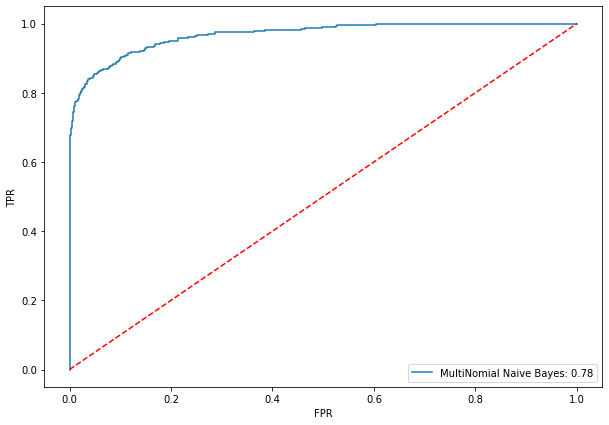

In [157]:
#Plot ROC for NB
score=roc_auc_score(y_test, nb.predict(X_test)) #get score
score
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr, label='MultiNomial Naive Bayes: '+str(score)[0:4])
plt.plot([0,1],[0,1],'r--') #r is red and -- is dashed line
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

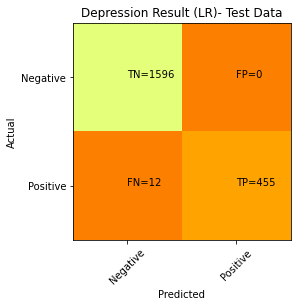

In [147]:
plt.clf()
plt.imshow(con_lr, interpolation='nearest', cmap=plt.cm.Wistia_r)
classnames=['Negative', 'Positive']
plt.title('Depression Result (LR)- Test Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=45)
plt.yticks(tick_marks, classnames)
s=[['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(con_lr[i][j]))
plt.show()

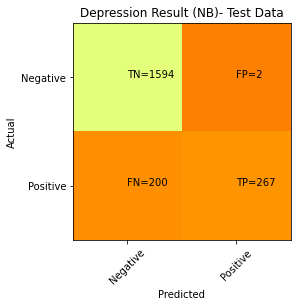

In [148]:
plt.clf()
plt.imshow(con_nb, interpolation='nearest', cmap=plt.cm.Wistia_r)
classnames=['Negative', 'Positive']
plt.title('Depression Result (NB)- Test Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=45)
plt.yticks(tick_marks, classnames)
s=[['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(con_nb[i][j]))
plt.show()

### Logistic Regression is Performing better than Naive Bayes

# Predicting new tweets by applying pre-trained Logistic Regression Model

In [158]:
while(1):
    text=input("Enter a tweet: ")
    #text="i stay up all night and tell myself i am alright. one problem about depression is that when good things happen you still have depression"
    text=text_preprocess(text)
    text=text.replace(r"[0-9]", "")
    tet= vectorizer.transform([text])
    result=lr.predict(tet)

    if result:
        print ("Depressed")
    else:
        print ("Not Depressed")
    ch=input("do you want to try another tweet? (Y/N): ")
    if ch=='n' or ch=='N':
        break

Enter a tweet: i stay up all night and tell myself i am alright. one problem about depression is that when good things happen you still have depression
Depressed
do you want to try another tweet? (Y/N): n
